In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [2]:
# load data
uvm_meta = pd.read_csv('uvm_pred.csv', index_col=0)
# print(uvm_meta.shape)

/opt/anaconda/3-5.2.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
uvm_meta

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,log10GenesPerUMI,cell,Sample.Type,GEP.Class,PRAME,Age.at.Diagnosis,...,cell_type,Y_avg,loy_pred,housekeeping_avg,stable_avg,nCount_RNA_total,nFeature_RNA_total,group,cell_group,super_cell
UMM065_AAACCTGAGCCGCCTA-1,UMM065,0,0,8.919203,0.804457,UMM065_AAACCTGAGCCGCCTA-1,Primary,1A,Negative,44,...,Tumor cells,0.0,LOY,2.927250,0.462076,33355,4352,Female,Tumor,Tumor cells
UMM065_AAACCTGAGCTGCGAA-1,UMM065,0,0,2.877414,0.846892,UMM065_AAACCTGAGCTGCGAA-1,Primary,1A,Negative,44,...,Tumor cells,0.0,LOY,2.986565,0.336705,2537,764,Female,Tumor,Tumor cells
UMM065_AAACCTGAGGCTAGGT-1,UMM065,0,0,6.060606,0.898820,UMM065_AAACCTGAGGCTAGGT-1,Primary,1A,Negative,44,...,Tumor cells,0.0,LOY,2.617292,0.222781,528,280,Female,Tumor,Tumor cells
UMM065_AAACCTGAGTGGAGTC-1,UMM065,0,0,0.505051,0.880197,UMM065_AAACCTGAGTGGAGTC-1,Primary,1A,Negative,44,...,Tumor cells,0.0,LOY,2.637506,0.233405,792,356,Female,Tumor,Tumor cells
UMM065_AAACCTGCAAACAACA-1,UMM065,0,0,4.963347,0.822342,UMM065_AAACCTGCAAACAACA-1,Primary,1A,Negative,44,...,Tumor cells,0.0,LOY,2.908884,0.431840,14869,2698,Female,Tumor,Tumor cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UMM064_TTTGTCATCAGCAACT-1,UMM064,0,0,0.000000,0.943523,UMM064_TTTGTCATCAGCAACT-1,Primary,2,Positive,77,...,Tumor cells,0.0,LOY,2.248975,0.273759,568,397,UMM064_77,Tumor,Tumor cells
UMM064_TTTGTCATCCAAACAC-1,UMM064,0,0,9.966491,0.818907,UMM064_TTTGTCATCCAAACAC-1,Primary,2,Positive,77,...,Tumor cells,0.0,LOY,2.545423,0.550791,32529,4956,UMM064_77,Tumor,Tumor cells
UMM064_TTTGTCATCCCACTTG-1,UMM064,0,0,1.215805,0.908685,UMM064_TTTGTCATCCCACTTG-1,Primary,2,Positive,77,...,Tumor cells,0.0,LOY,2.524063,0.320737,1316,683,UMM064_77,Tumor,Tumor cells
UMM064_TTTGTCATCCGCATCT-1,UMM064,0,0,6.391370,0.845596,UMM064_TTTGTCATCCGCATCT-1,Primary,2,Positive,77,...,Tumor cells,0.0,LOY,2.379560,0.563775,21044,4525,UMM064_77,Tumor,Tumor cells


In [4]:
# change LOY to 0/1
uvm_meta["loy_pred"] = np.where(uvm_meta["loy_pred"]=="LOY", 1, 0)

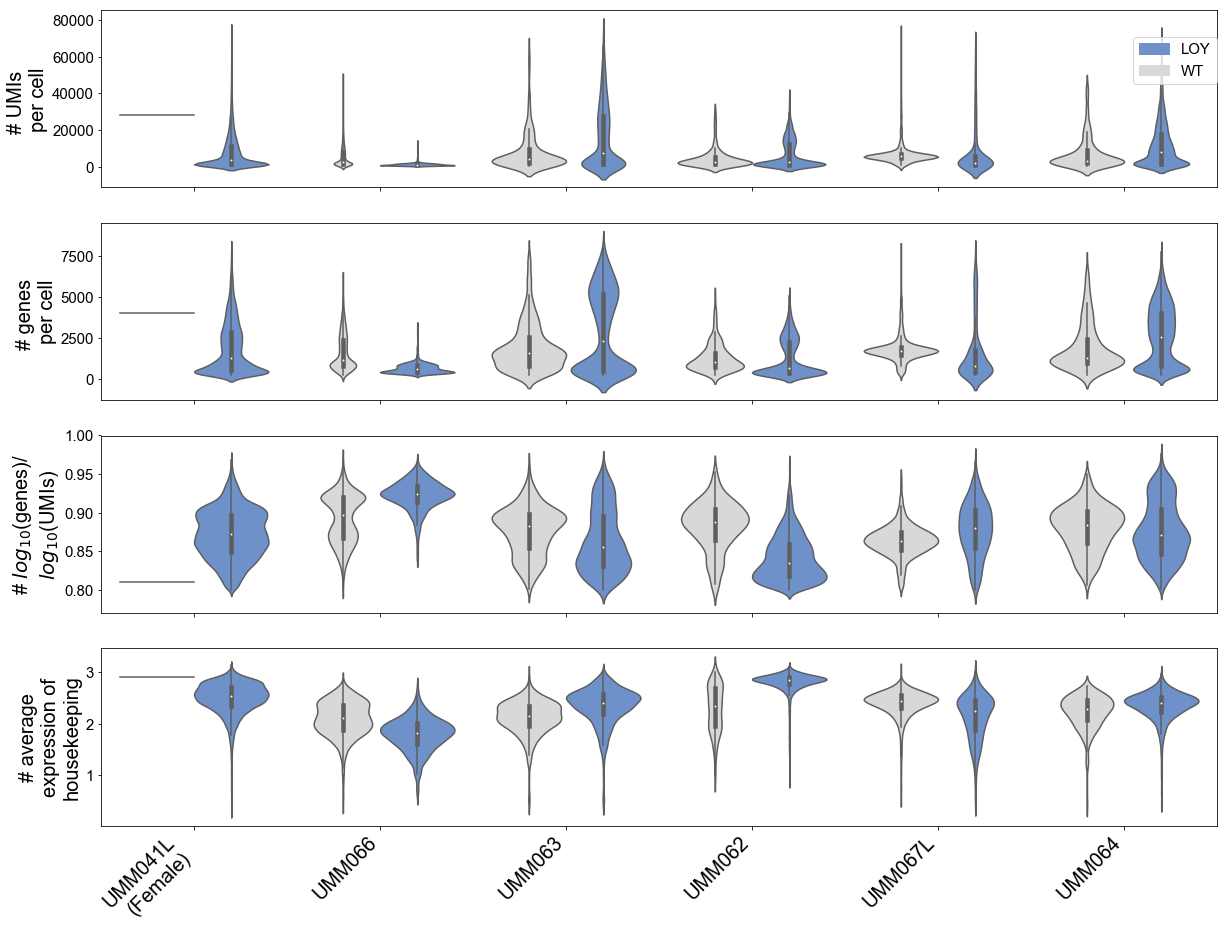

<Figure size 2520x1440 with 0 Axes>

In [5]:
# Supplementary Figure 5D
# ploting the figure of quality control
plt.rcParams['font.sans-serif'] = ['Arial']
fig, axs = plt.subplots(ncols = 1, nrows = 4, figsize=(20, 15), sharex = True)
# plt.subplots_adjust(hspace=1.7, wspace=0.2)
plt.figure(figsize=(35, 20))
i=0
for qc in ["nCount_RNA_total", "nFeature_RNA_total", "log10GenesPerUMI","housekeeping_avg"]:
    ax = sns.violinplot(x = "group", 
                   y = qc, 
                   data = uvm_meta, 
                   hue = "loy_pred",
                   palette=['#D7D8DA','#6E91CA'],
                   saturation=1,
                   ax=axs[i//1], sharex = axs[0])
    i+=1
    ax.set_ylabel(qc, fontsize=20)
    ax.tick_params(axis = 'y', which  = 'major', labelsize= 15)
    ax.get_legend().remove()
    ax.set_xlabel([], color = 'w')

ax.tick_params('x', labelbottom = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=20, ha = 'right')

axs[0].set_ylabel("# UMIs \nper cell")
axs[1].set_ylabel("# genes \nper cell")
axs[2].set_ylabel("# $log_{10}$(genes)/\n$log_{10}$(UMIs)")
axs[3].set_ylabel("# average\nexpression of\nhousekeeping")

female_patch = mpatches.Patch(color='#6E91CA', label='LOY')
male_patch = mpatches.Patch(color='#D7D8DA', label='WT')
fig.legend(handles=[female_patch, male_patch], bbox_to_anchor=(0.85, 0.85), fontsize=15)


group_labels = ["UMM041L\n(Female)", "UMM066", "UMM063", "UMM062", "UMM067L", "UMM064"]
ax.set_xticklabels(group_labels)


# fig.savefig("fig_cell-quality-scores-uvm.png")
fig.savefig("fig_cell-quality-scores-uvm.pdf")
